In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rmax=50
def s_to_r(s,m,noise=True,rmax=rmax):
    s=s*np.pi/180
    y=rmax*np.cos((-m*np.pi/2+s))
    y=np.clip(y,0,None)
    if noise==True:
        r=y+np.random.normal(0,5,y.shape)
    else:
        r=y
    r=np.clip(r,0,None)
    return r

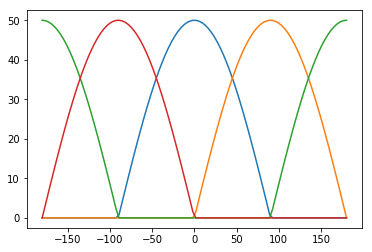

In [3]:
x=np.linspace(-180,180,100)
c=['r','b','g','y']
for i in range(4):
    y=[]
    y.append(s_to_r(x,i,False))
    plt.plot(x,np.array(y).reshape(100,1))
    

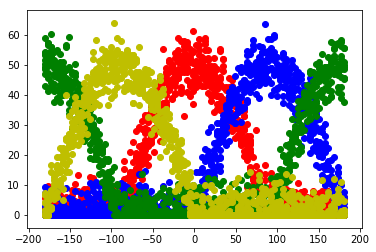

In [4]:
x=np.linspace(-180,180,100)
co=['r','b','g','y']
for i in range(4):
    for _ in range(10):
        y=s_to_r(x,i,noise=True)
        z=np.array(y)
        plt.scatter(x,z,color=co[i])


In [5]:
def deg_to_vec(d):
    d=d*np.pi/180
    return np.array([np.cos(d),np.sin(d)])

In [9]:


def est(true_deg,p=False):
    loss=[]
    true_vec=deg_to_vec(true_deg)

    c=[]
    r=[]
    for m in range(4):
        c.append(deg_to_vec(m*90))
        r.append(s_to_r(true_deg,m))
    ans=np.zeros(2)
    for k in range(4):
        ans+=c[k]*np.float(np.mean(r[k]))/rmax
    ans_vec=ans
    ans_rad=np.arctan2(ans[1],ans[0])
    ans_deg=ans_rad/np.pi*180
    if p==True:
        print( 'pred is {0} , true is {1}'.format(ans_deg,true_deg))

    return ans_deg

In [11]:
ans_deg=est(100,p=True)

pred is 101.002755841 , true is 100


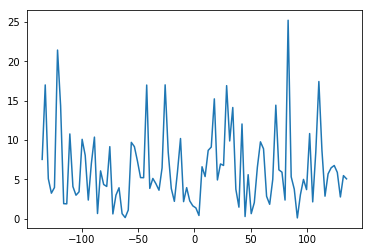

In [19]:

d_array=np.linspace(-135,135,100)
ans=[]
loss=[]

ans_deg=np.array([est(d) for d in d_array])
loss=np.abs(ans_deg-d_array)

plt.plot(d_array,loss)

In [17]:
loss_all=[]
d_array=np.linspace(-135,135,100)

for i in range(1000):
    ans_deg=np.array([est(d) for d in d_array])
    loss_all.append(np.abs(ans_deg-d_array))
loss_all=np.array(loss_all)

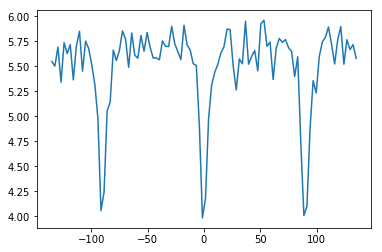

In [18]:
plt.plot(d_array,np.mean(loss_all,axis=0))